### Data Description:
The data at hand contains medical costs of people
characterized by certain attributes.

### Domain:Healthcare

### Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

### Attribute Information:
age : age of primary beneficiary

sex : insurance contractor gender, female, male

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children : Number of children covered by health insurance / Number of dependents

smoker : Smoking

region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges : Individual medical costs billed by health insurance.

### Learning Outcomes:
● Exploratory Data Analysis

● Practicing statistics using Python

● Hypothesis testing

### Objective:
We want to see if we can dive deep into this data to find some
valuable insights.

### 1. Import the necessary libraries

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn as skl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Read the data as a data frame

In [19]:
insurance_df = pd.read_csv('insurance.csv')

### 3. Perform basic EDA which should include the following and print out your insights at every step.
### a. Shape of the data

In [20]:
insurance_df.shape

(1338, 7)

### b. Data type of each attribute

In [21]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking the presence of missing values

In [23]:
# As per insurance_df.info, none of the columns have any NULL values. However, we will reconfirm this on individual columns 
# using the isnull function on the dataframe & then checking if any NULL/NaN value is present in any column
insurance_df.isnull().values.any()

False

In [24]:
insurance_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [25]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [26]:
#Some basic observations from the above:
# We have 1338 data points & of the same, 676 are MALE & 662 are FEMALE. So the data is evenly balanced for the genders
# Mean Age & Median Age is very similar
# Mean BMI & Median BMI is also quiet similar
# The dataset has a HIGH NUMBER of SMOKERS. So our model will be better in predicting the charges for SMOKERS, than for NON-SMOKERS
# The different regions are also quiet equally distributed
# The AGE, BMI & CHARGES fields seem to have continuous data

### d. 5 point summary of numerical attributes

In [27]:
# There are 4 NUMERICAL features, namely AGE, BMI, CHILDREN & CHARGES. We will perform 5-Point Summary for all of these
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [28]:
insurance_df[['age','bmi','charges']]

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

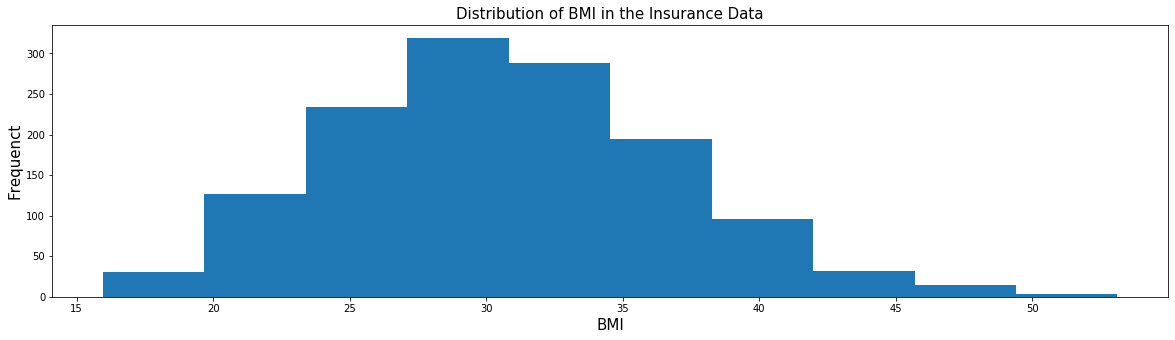

In [29]:
plt.figure(figsize=(20,5))
plt.title('Distribution of BMI in the Insurance Data',fontsize=15)
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Frequenct',fontsize=15)
plt.hist(insurance_df['bmi'])

(array([166.,  56.,  56.,  84.,  55.,  54.,  78.,  50.,  50.,  52.,  81.,
         56.,  58.,  86.,  58.,  56.,  78.,  50.,  46.,  68.]),
 array([18. , 20.3, 22.6, 24.9, 27.2, 29.5, 31.8, 34.1, 36.4, 38.7, 41. ,
        43.3, 45.6, 47.9, 50.2, 52.5, 54.8, 57.1, 59.4, 61.7, 64. ]),
 <a list of 20 Patch objects>)

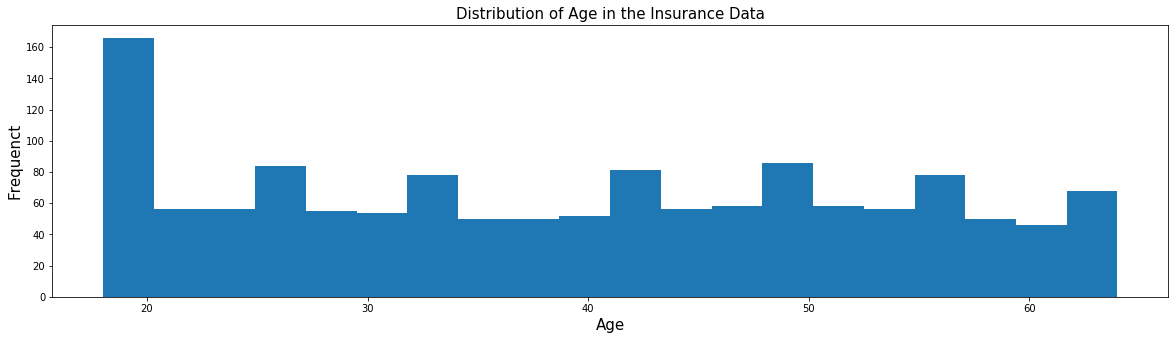

In [30]:
plt.figure(figsize=(20,5))
plt.title('Distribution of Age in the Insurance Data',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequenct',fontsize=15)
plt.hist(insurance_df['age'],bins=20)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

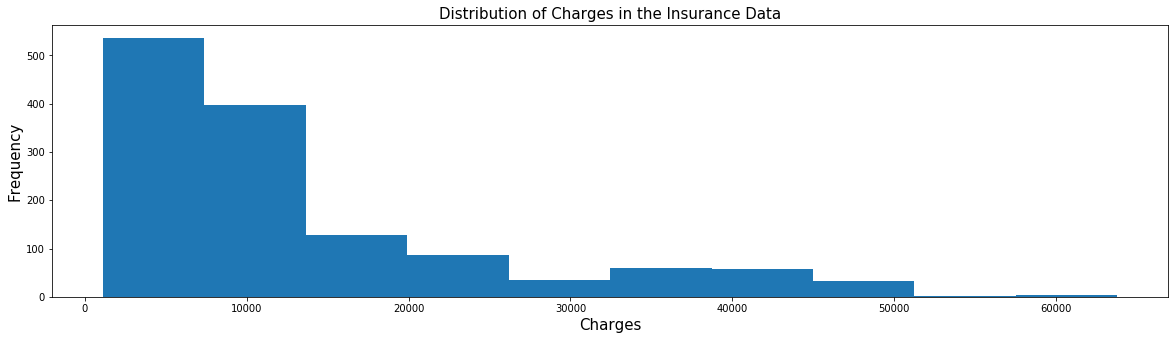

In [31]:
plt.figure(figsize=(20,5))
plt.title('Distribution of Charges in the Insurance Data',fontsize=15)
plt.xlabel('Charges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(insurance_df['charges'])

### f.  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [32]:
print ('The bmi data is skewed by: ',insurance_df['bmi'].skew())
print ('The age data is skewed by: ',insurance_df['age'].skew())
print ('The charges data is skewed by: ',insurance_df['charges'].skew())

The bmi data is skewed by:  0.2840471105987448
The age data is skewed by:  0.05567251565299186
The charges data is skewed by:  1.5158796580240388


In [33]:
# The pandas SKEW() function returns unbiased skew over requested axis Normalized by N-1.
# Based on the above values, the AGE data is quite less skewed, while the CHARGES data is highly skewed.
# All the skew, is on the positive side, i.e. MEAN > MEDIAN
# This is also collaborated by the below BOX-PLOTS

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

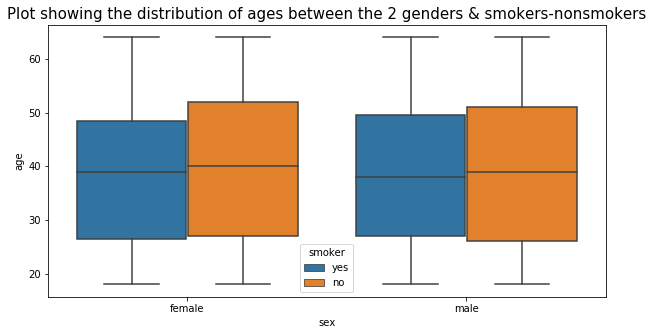

In [34]:
plt.figure(figsize=(10,5))
plt.title('Plot showing the distribution of ages between the 2 genders & smokers-nonsmokers', fontsize=15)
sns.boxplot(x=insurance_df['sex'],y=insurance_df['age'],hue=insurance_df['smoker'])

In [35]:
# The Median age of Non-Smokers seems to be higher for both Men & Women.
# The Age data doesn't seem to be skewed for either Men for Women, although the 75% age for Non-Smoking Female is higher than
# the same for Smoking Females. In fact, the data seems to be LEFT-SKEWED for Smoking Females.
# For Men, the 25% age is lower & 75% age higher for Non-Smokers. The Median age is slightly higher for Non-Smoking men
# There are no outliers

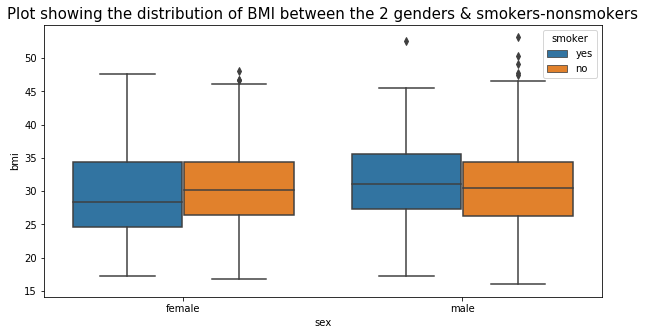

In [36]:
plt.figure(figsize=(10,5))
plt.title('Plot showing the distribution of BMI between the 2 genders & smokers-nonsmokers', fontsize=15)
sns.boxplot(x=insurance_df['sex'],y=insurance_df['bmi'],hue=insurance_df['smoker'])

In [37]:
# There seems to be lots of outliers in the BMI distribution of Non-Smokers, for both Male & Female. There is some 
# outlier for smoking men also
# The data is right-skewed for Smoking Females, although the 75% BMI is same for Smoking & Non-Smoking Females. The 25% BMI is
# higher for Non-Smoking Females
# The data is right-skewed for Smoking Males too, and the 25% BMI is lower for Non-Smoking Males, as is the 75% BMI. 
# The Median BMI for Non-Smokers seems to be similar for both Male & Female

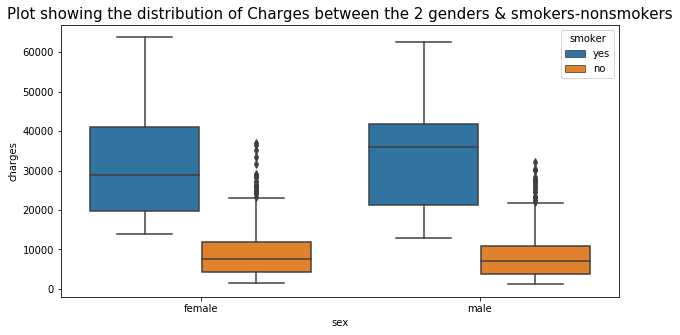

In [38]:
plt.figure(figsize=(10,5))
plt.title('Plot showing the distribution of Charges between the 2 genders & smokers-nonsmokers', fontsize=15)
sns.boxplot(x=insurance_df['sex'],y=insurance_df['charges'],hue=insurance_df['smoker'])

In [39]:
# There seems to be lots of outliers in the Insurance Charges levied for Non-Smokers, for both Male & female
# There are clear distinction in the charges applied to Smokers & Non-Smokers, for both Men & Women. The Smokers are clearly
# paying more insurance premium than the non-smokers, although there are lots of positive outliers for the latter.
# The data for smoking males is highly LEFT-SKEWED & slightly RIGHT_SKEWED for Females.

### h. Distribution of categorical columns (include children)

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

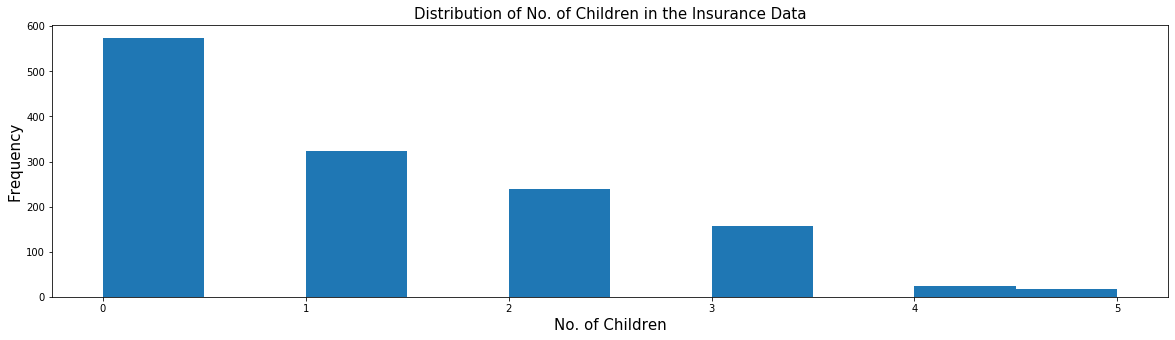

In [40]:
plt.figure(figsize=(20,5))
plt.title('Distribution of No. of Children in the Insurance Data',fontsize=15)
plt.xlabel('No. of Children',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(insurance_df['children'])

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

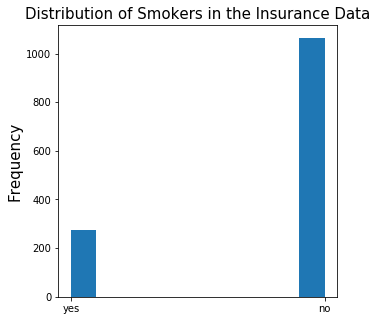

In [41]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Smokers in the Insurance Data',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(insurance_df['smoker'])

(array([662.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

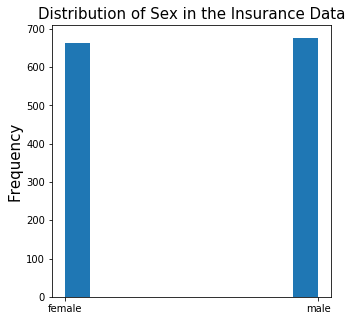

In [42]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Sex in the Insurance Data',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(insurance_df['sex'])

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

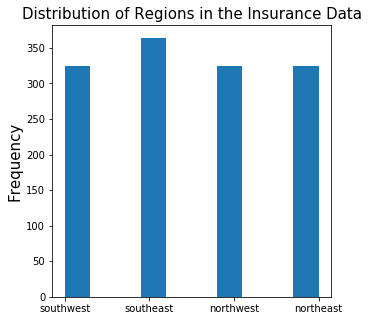

In [43]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Regions in the Insurance Data',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(insurance_df['region'])

### i. Pair plot that includes all the columns of the dataframe

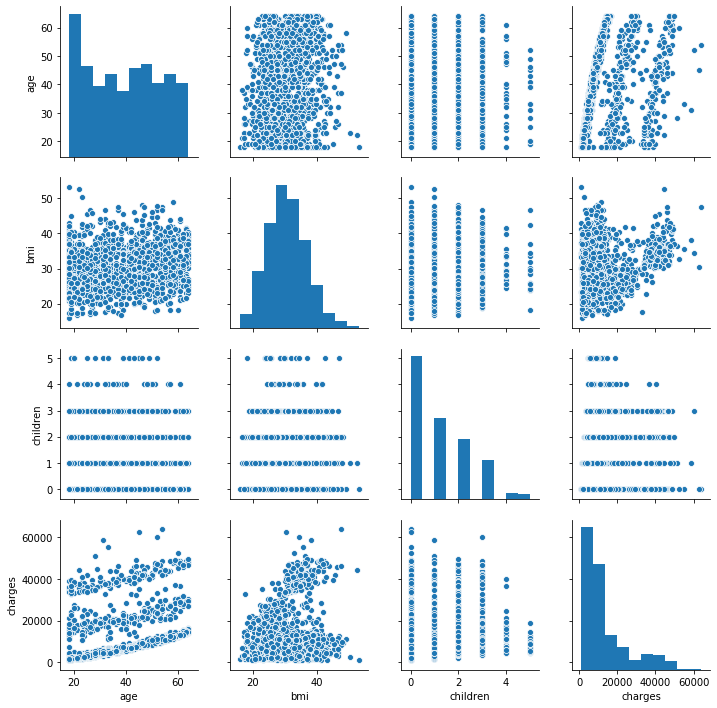

In [44]:
sns.pairplot(insurance_df)

### 4. Answer the following questions with statistical evidence
### a. Do charges of people who smoke differ significantly from the people who don't?

In [45]:
# H0: Charges for Smokers are not different from that for Non-Smokers. MEAN(charges for smokers)=MEAN(charges for non-smokers)
# Ha: Charges for smokers are different from that for Non-Smokers. MEAN(charges for smokers)<>MEAN(charges for non-smokers)

In [46]:
t_stat, p_value = stats.ttest_ind(insurance_df['smoker']=='yes',insurance_df['smoker']=='no')
print (t_stat)
print ('%.30f'%p_value)

-37.82959586208586
0.000000000000000000000000000000


In [47]:
# Based on the above p_value & T-Statistic, the Insurance charges between smokers & non-smokers differ by a
# Standard Deviation of -38, which is statistically quiet significant.
# Additionally, the p_value is extremely small, compared to alpha(0.05 for 95% Confidence Interval), which is why
# we REJECT the NULL-HYPOTHESIS(H0)

### b. Does bmi of males differ significantly from that of females?

In [48]:
# H0: BMI for Males & Females are not different MEAN(BMI for Males)=MEAN(BMI for Females)
# Ha: BMI for Males & Females are different MEAN(BMI for Males)<>MEAN(BMI for Females)

In [49]:
male_bmi_df = insurance_df['bmi'].where(insurance_df['sex']=='male')
female_bmi_df = insurance_df['bmi'].where(insurance_df['sex']=='female')
male_bmi_df.dropna(inplace=True)
female_bmi_df.dropna(inplace=True)

In [50]:
t_stat, p_value = stats.ttest_ind(male_bmi_df,female_bmi_df)
print (t_stat)
print ('%.30f'%p_value)

1.696752635752224
0.089976371789849324267507313380


In [51]:
# Based on the above p_value & T-Statistic, the BMI for Male & Female candidates differ by a
# Standard Deviation of 1.69, which is statistically not that large.
# Additionally, since the p_value is larger than alpha(0.05 for 95% Confidence Interval), 
# we FAIL TO REJECT the NULL-HYPOTHESIS(H0)

### c. Is the proportion of smokers significantly different in different genders?

In [52]:
# H0=Proportion of smokers is equal in both genders
# Ha=Proportion of smokers is different in two genders

In [53]:
#No. of female smokers
female_smokers=insurance_df[insurance_df['sex']=='female'].smoker.value_counts()[1]

#No. of male smokers
male_smokers=insurance_df[insurance_df['sex']=='male'].smoker.value_counts()[1]

#No. of male & females in the data
female=insurance_df.sex.value_counts()[1]
male=insurance_df.sex.value_counts()[0]

In [54]:
print ('No. of males in the sample: ',male)
print ('No. of females in the sample: ', female)
print ('No. of male smokers in the sample: ', male_smokers)
print ('No. of female smokers in the sample: ', female_smokers)
print ('Proportion of smokers in male: %.2f'%round(male_smokers/male,2))
print ('Proportion of smokers in female: %.2f'%round(female_smokers/female,2))

No. of males in the sample:  676
No. of females in the sample:  662
No. of male smokers in the sample:  159
No.of female smokers in the sample:  115
Proportion of smokers in male: 0.24
Proportion of smokers in female: 0.17


In [55]:
from statsmodels.stats.proportion import proportions_ztest
stat,p_val=proportions_ztest([male_smokers,female_smokers],[male,female])
print (stat, p_val)

2.7867402154855503 0.005324114164320532


In [56]:
# From the above, the proportion of smokers in males is almost 3 standard deviations more than that in females
# Additionally, since the p_value is also quiet small as compared to alpha=0.05 (for 95% confidence interval), we
# REJECT the NULL-HYPOTHESIS (H0)

### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [57]:
f_nochild=insurance_df[insurance_df['sex']=='female'].children.value_counts()[0] # No. of women with 0 child
f_onechild=insurance_df[insurance_df['sex']=='female'].children.value_counts()[1] # No.of women with 1 child
f_twochild=insurance_df[insurance_df['sex']=='female'].children.value_counts()[2] #No. of women with 2 children

In [58]:
female = insurance_df.where(insurance_df['sex']=='female')
f_bmi_nochild = female['bmi'].where(insurance_df['children']==0)
f_bmi_1child = female['bmi'].where(insurance_df['children']==1)
f_bmi_2child = female['bmi'].where(insurance_df['children']==2)

In [59]:
f_bmi_nochild.dropna(inplace=True)
f_bmi_1child.dropna(inplace=True)
f_bmi_2child.dropna(inplace=True)

In [60]:
f_bmi_nochild

0       27.90
5       25.74
9       25.84
11      26.29
13      39.82
        ...  
1331    33.40
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 289, dtype: float64

In [61]:
mean_bmi = pd.DataFrame()
df1 = pd.DataFrame({'Children': '0','BMI':f_bmi_nochild})
df2 = pd.DataFrame({'Children': '1','BMI':f_bmi_1child})
df3 = pd.DataFrame({'Children': '2','BMI':f_bmi_2child})

mean_bmi=mean_bmi.append(df1)
mean_bmi=mean_bmi.append(df2)
mean_bmi=mean_bmi.append(df3)

#mean_bmi.fillna(0,inplace=True)
#mean_bmi

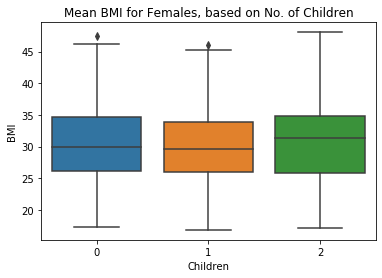

In [62]:
sns.boxplot(x = "Children", y = "BMI", data = mean_bmi)
plt.title('Mean BMI for Females, based on No. of Children')
plt.show()

In [63]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ Children', data = mean_bmi).fit()
mod

In [64]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [65]:
# In this case, the p-value is 0.715858, which is larger than our chosen level of significance of 5% (denoted by alpha=0.05)
# So the statistical decision is to reject the null hypothesis at 5% level of significance.
# Thus is there is sufficient statistical evidence to support the NULL HYPOTHESIS (H0) that the 
# "distribution of bmi across women with no children, one child and two children" is same & hence we
# FAIL TO REJECT THE NULL HYPOTHESIS